In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r'E:\VTI.csv',index_col='Date')

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,147.729996,148.570007,147.539993,147.610001,144.883133,2259800
2019-06-11,148.619995,148.830002,147.080002,147.470001,144.745712,1724500
2019-06-12,147.350006,147.639999,146.929993,147.270004,144.549408,1729900
2019-06-13,147.789993,148.089996,147.429993,147.949997,145.216858,1726600
2019-06-14,147.800003,147.990005,147.270004,147.630005,144.902771,1401000


In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-02,155.199997,156.000000,154.429993,155.919998,155.919998,4157200
2020-06-03,157.199997,158.800003,157.009995,158.350006,158.350006,9496400
2020-06-04,157.710007,158.649994,156.619995,157.850006,157.850006,5629200
2020-06-05,161.399994,163.080002,161.000000,161.899994,161.899994,4373400
2020-06-08,162.899994,164.199997,162.320007,164.100006,164.100006,5848700


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-06-10 to 2020-06-08
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 12.8+ KB


In [20]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,151.852936,152.825556,150.743889,151.883691,150.633607,4.223456e+06
std,11.201069,10.541967,11.773754,11.126312,10.987038,3.499087e+06
min,113.650002,114.900002,109.489998,111.910004,111.356850,1.171000e+06
25%,147.707497,148.297497,146.545002,147.470001,145.217224,2.165425e+06
50%,152.154998,152.690002,151.369995,152.110001,150.367539,2.997150e+06
75%,158.819996,159.187496,158.134994,158.659996,157.675289,4.508950e+06
max,171.960007,172.559998,171.770004,172.169998,171.318985,2.228330e+07


In [34]:
# checking correlation
corr  = data.corr()
corr['Open'].sort_values(ascending=False)


Open         1.000000
High         0.995759
Low          0.995045
Close        0.990631
Adj Close    0.987299
Volume      -0.566853
Name: Open, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C53D630>,
      dtype=object)

<Figure size 1152x648 with 0 Axes>

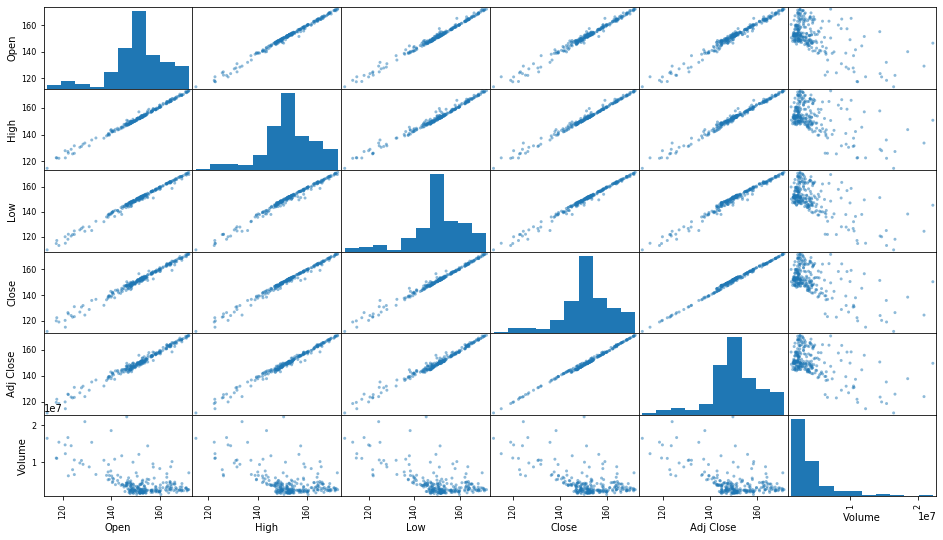

In [42]:

from pandas.plotting import scatter_matrix
attr = data.columns
plt.figure(figsize=(16,9))
scatter_matrix(data[attr],figsize=(16,9))


In [48]:
# feature engineering | created two more columns ::
data['O-C'] = data['Open'] - data['Close']
data['H-L']= data['High'] - data['Low']

In [49]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,O-C,H-L
Date,,,,,,,,
2019-06-10,147.729996,148.570007,147.539993,147.610001,144.883133,2259800,0.119995,1.030014
2019-06-11,148.619995,148.830002,147.080002,147.470001,144.745712,1724500,1.149994,1.750000
2019-06-12,147.350006,147.639999,146.929993,147.270004,144.549408,1729900,0.080002,0.710006
2019-06-13,147.789993,148.089996,147.429993,147.949997,145.216858,1726600,-0.160004,0.660003
2019-06-14,147.800003,147.990005,147.270004,147.630005,144.902771,1401000,0.169998,0.720001


In [86]:
X = data.drop(columns='Adj Close',axis=1)
Y = data.iloc[:,4:5]

In [87]:
# all work with in pineline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pineline = Pipeline([
    ('standardscale',StandardScaler())
])

In [90]:
X_scaled = pineline.fit_transform(X)
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'O-C', 'H-L'], dtype='object')


In [91]:
# creating data frame with scalled arraays
scaled_data = pd.DataFrame(X_scaled,columns = ['Open', 'High', 'Low', 'Close','Volume', 'O-C', 'H-L'])

In [92]:
scaled_data.head()

,Open,High,Low,Close,Volume,O-C,H-L
0,-0.368817,-0.404480,-0.272663,-0.384871,-0.562308,0.098725,-0.550137
1,-0.289202,-0.379768,-0.311810,-0.397479,-0.715595,0.773266,-0.173500
2,-0.402809,-0.492875,-0.324577,-0.415490,-0.714049,0.072534,-0.717538
3,-0.363450,-0.450104,-0.282025,-0.354252,-0.714994,-0.084645,-0.743696
4,-0.362555,-0.459608,-0.295640,-0.383069,-0.808232,0.131472,-0.712310


In [93]:
# train test split
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(scaled_data,Y,test_size=0.2,random_state=0)

In [95]:
# building model starts from here
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,Y_train)
Y_pred = model.predict(x_test)

In [96]:
Y_pred[:5]

array([[165.8842289 ],
       [147.5776136 ],
       [169.19947706],
       [152.61629936],
       [165.45253506]])

In [106]:
y_test.iloc[:5].values

array([[166.264099],
       [147.602509],
       [169.577637],
       [152.590546],
       [165.766571]])

In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,Y_pred)
rmse = np.sqrt(mse)

rmse

In [103]:
rmse

0.7255533672590541

In [105]:
mse

0.5264276887409518

In [110]:
model amodel.score(X_train,Y_train)

0.9954182723151841